### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

## INSTALLING THE DATASET

In [5]:
!pip install scikit-learn --upgrade

In [6]:
!pip install opendatasets --upgrade --quiet

In [7]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [8]:
import os
data_dir = './weather-dataset-rattle-package'
os.listdir(data_dir)
train_csv = data_dir + '/weatherAUS.csv'

In [9]:
import pandas as pd
raw_df=pd.read_csv(train_csv)

In [10]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [11]:
raw_df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [13]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [15]:
import matplotlib
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [17]:
px.histogram(raw_df,x='Location',title='Location Vs RainToday',color='RainToday')

In [18]:
px.histogram(raw_df,x='Temp3pm',title='Temp at 3pm Vs RainTomorrow',
             color='RainTomorrow')

In [19]:
px.histogram(raw_df,x='RainToday',title='RainToday Vs RainTomorrow',
             color='RainTomorrow')

In [20]:
px.scatter(raw_df.sample(2000),title='Min vs MAx Temp',
           x='MinTemp',y='MaxTemp',color='RainToday')

In [152]:
px.scatter(raw_df.sample(2000),x='MinTemp',y='MaxTemp',color='RainTomorrow')

In [153]:
px.scatter(raw_df.sample(2000),x='Temp3pm',y='Humidity3pm',color='RainTomorrow')

<Axes: title={'center': 'No. Of Rows Per year'}, xlabel='Date', ylabel='count'>

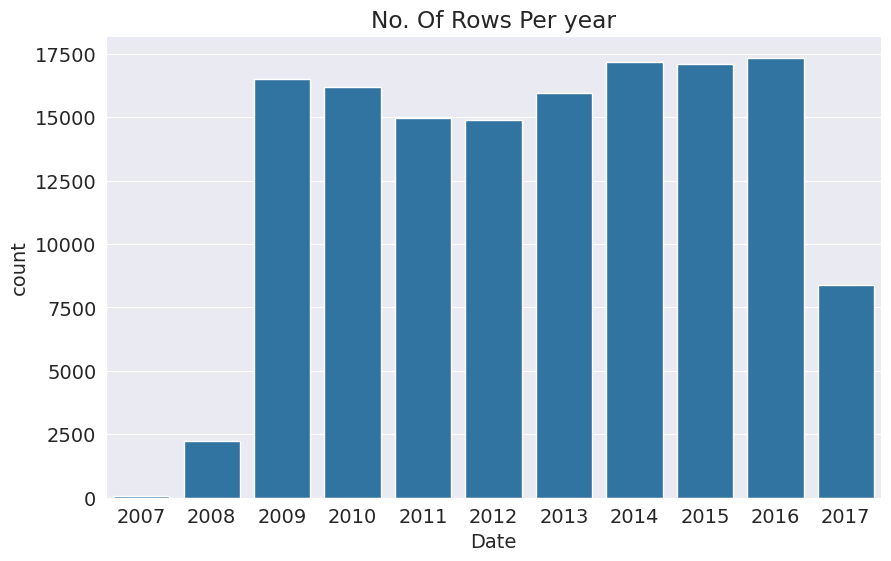

In [21]:
plt.title("No. Of Rows Per year")
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [22]:
year=pd.to_datetime(raw_df.Date).dt.year
train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [23]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [24]:
input_cols=list(train_df)[1:-1]
target_col="RainTomorrow"

In [25]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()

In [26]:
val_inputs=val_df[input_cols].copy()
val_target=val_df[target_col].copy()

test_inputs=test_df[input_cols].copy()
test_target=test_df[target_col].copy()

In [27]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [28]:
import numpy as np

In [29]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [30]:
len(train_inputs.columns) == len(numeric_cols)+len(categorical_cols)

True

In [31]:
train_inputs.nunique()

Location          49
MinTemp          382
MaxTemp          497
Rainfall         590
Evaporation      308
Sunshine         144
WindGustDir       16
WindGustSpeed     66
WindDir9am        16
WindDir3pm        16
WindSpeed9am      41
WindSpeed3pm      43
Humidity9am      101
Humidity3pm      101
Pressure9am      531
Pressure3pm      531
Cloud9am          10
Cloud3pm          10
Temp9am          432
Temp3pm          491
RainToday          2
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imputer=SimpleImputer(strategy='mean')

In [34]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [35]:
imputer.fit(train_inputs[numeric_cols])

SimpleImputer()

In [36]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])


In [37]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling the Features

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

In [40]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [41]:
scaler.data_min_

array([ -8.5,  -4.8,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
         0. , 980.5, 977.1,   0. ,   0. ,  -7.2,  -5.4])

In [42]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])


In [43]:
train_inputs[numeric_cols]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.036483  0.524759       0.294574   
1       0.375000  0.565217  0.000000     0.036483  0.524759       0.294574   
2       0.504717  0.576560  0.000000     0.036483  0.524759       0.310078   
3       0.417453  0.620038  0.000000     0.036483  0.524759       0.139535   
4       0.613208  0.701323  0.002695     0.036483  0.524759       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.036483  0.524759       0.286822   
144549  0.556604  0.786389  0.000000     0.036483  0.524759       0.193798   
144550  0.608491  0.805293  0.000000     0.036483  0.524759       0.255814   
144551  0.674528  0.818526  0.000000     0.036483  0.524759       0.286822   
144552  0.731132  0.839319  0.000000     0.036483  0.524759       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.153846      0.275862         0.71         0.22     0.449587   
1           0.030769      0.252874         0.44         0.25     0.497521   
2           0.146154      0.298851         0.38         0.30     0.447934   
3           0.084615      0.103448         0.45         0.16     0.613223   
4           0.053846      0.229885         0.82         0.33     0.500826   
...              ...           ...          ...          ...          ...   
144548      0.184615      0.298851         0.22         0.13     0.555372   
144549      0.146154      0.229885         0.16         0.08     0.530579   
144550      0.200000      0.103448         0.15         0.08     0.519008   
144551      0.215385      0.195402         0.22         0.09     0.553719   
144552      0.230769      0.149425         0.16         0.09     0.522314   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
0            0.4800  0.888889  0.490075  0.508439  0.522073  
1            0.4912  0.478106  0.490075  0.514768  0.570058  
2            0.5056  0.478106  0.222222  0.594937  0.548944  
3            0.5712  0.478106  0.490075  0.533755  0.612284  
4            0.4624  0.777778  0.888889  0.527426  0.673704  
...             ...       ...       ...       ...       ...  
144548       0.5232  0.478106  0.490075  0.651899  0.714012  
144549       0.4880  0.478106  0.490075  0.761603  0.771593  
144550       0.4944  0.478106  0.490075  0.778481  0.788868  
144551       0.5136  0.478106  0.490075  0.780591  0.817658  
144552       0.4656  0.478106  0.490075  0.786920  0.821497  

[97988 rows x 16 columns]

# Encoding Categorical Data

In [44]:
raw_df[categorical_cols]

Location WindGustDir WindDir9am WindDir3pm RainToday
0        Albury           W          W        WNW        No
1        Albury         WNW        NNW        WSW        No
2        Albury         WSW          W        WSW        No
3        Albury          NE         SE          E        No
4        Albury           W        ENE         NW        No
...         ...         ...        ...        ...       ...
145454    Uluru           E        ESE          E        No
145455    Uluru           E         SE        ENE        No
145456    Uluru         NNW         SE          N        No
145457    Uluru           N         SE        WNW        No
145458    Uluru          SE        SSE          N        No

[140787 rows x 5 columns]

In [45]:
pip install scikit-learn

In [50]:
import sklearn
from sklearn.preprocessing import OneHotEncoder

In [55]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [58]:
encoder=OneHotEncoder(handle_unknown='ignore')

In [59]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

In [68]:
t_df=train_inputs

In [69]:
t_df=pd.get_dummies(t_df,columns=categorical_cols)

In [92]:
train_inputs=pd.get_dummies(train_inputs,columns=categorical_cols)
val_inputs=pd.get_dummies(val_inputs,columns=categorical_cols)
test_inputs=pd.get_dummies(test_inputs,columns=categorical_cols)


#LOGISTIC REGRESSION


## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
model=LogisticRegression(solver='liblinear')

In [95]:
model.fit(train_inputs,train_target)

LogisticRegression(solver='liblinear')

In [96]:
feature_names = train_inputs.columns
coef=model.coef_.tolist()[0]

In [97]:
coef_df=pd.DataFrame(coef,feature_names)

In [98]:
coef_df

0
MinTemp         0.893366
MaxTemp        -2.857399
Rainfall        3.170245
Evaporation     0.889774
Sunshine       -1.670255
...                  ...
WindDir3pm_W   -0.251764
WindDir3pm_WNW -0.104476
WindDir3pm_WSW -0.346956
RainToday_No   -1.509661
RainToday_Yes  -1.011814

[115 rows x 1 columns]

In [99]:
model.intercept_

array([-2.52147426])

In [100]:
x_train=train_inputs
x_val=val_inputs
x_test=test_inputs

In [101]:
train_preds=model.predict(x_train)

In [102]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [103]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [104]:
train_probs=model.predict_proba(x_train)
train_probs

array([[0.94451006, 0.05548994],
       [0.94115297, 0.05884703],
       [0.96077642, 0.03922358],
       ...,
       [0.9874842 , 0.0125158 ],
       [0.98333265, 0.01666735],
       [0.87448634, 0.12551366]])

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(train_target,train_preds)

0.8519512593378781

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
confusion_matrix(train_target,train_preds,normalize='true')

array([[0.94614779, 0.05385221],
       [0.47729149, 0.52270851]])

In [114]:
def predict_and_plot(inputs,targets,name=''):
  preds=model.predict(inputs)

  accuracy=accuracy_score(targets,preds)
  print("Accuracy: {:.2f}%".format(accuracy*100))

  cf=confusion_matrix(targets,preds,normalize='true')
  plt.figure()
  sns.heatmap(cf,annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  return preds


Accuracy: 85.20%


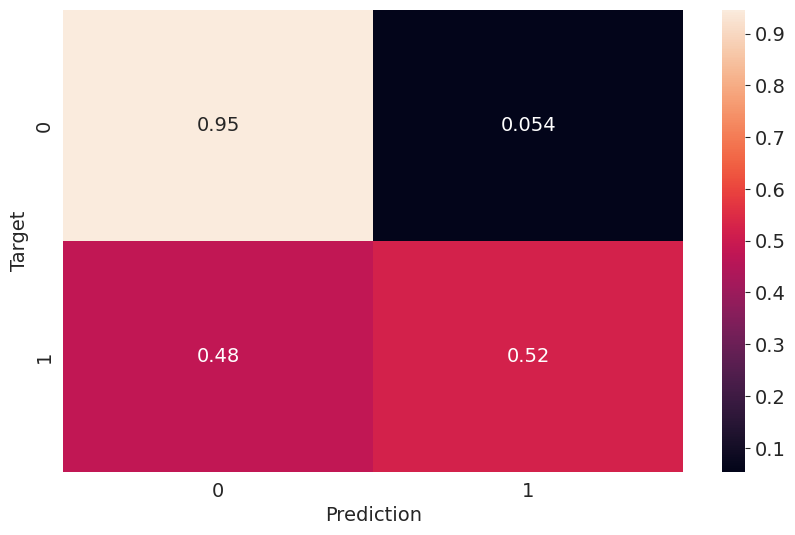

In [115]:
train_preds=predict_and_plot(x_train,train_target,'Training')

Accuracy: 85.41%


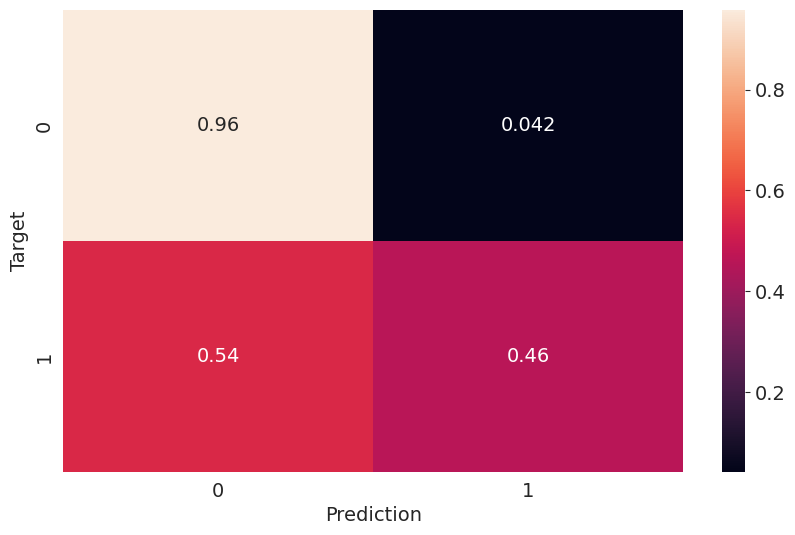

In [116]:
val_preds=predict_and_plot(x_val,val_target,name='Validation')

Accuracy: 84.22%


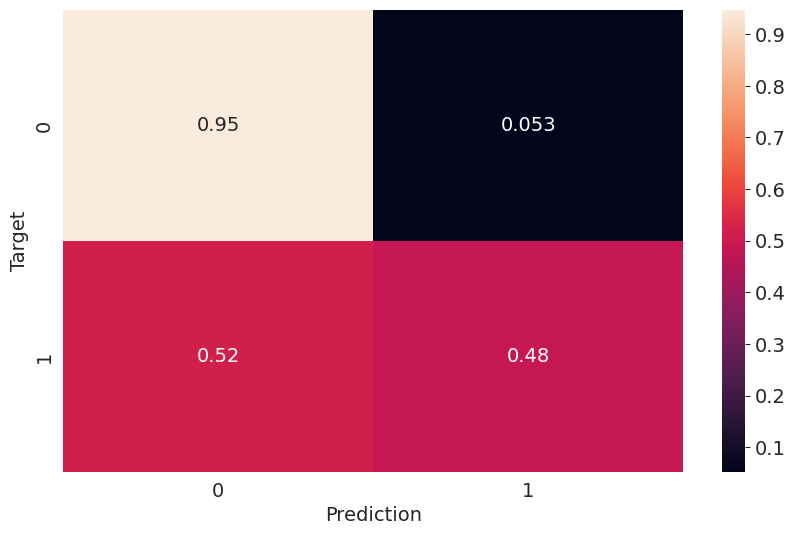

In [117]:
test_preds=predict_and_plot(x_test,test_target,'Test')

## Making Predictions on a Single Input

Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from the Katherine weather department today.

In [118]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [119]:
new_input_df=pd.DataFrame([new_input])

In [120]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0         NNW           52.0         NW  ...         20.0         89.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         58.0       1004.8       1001.5       8.0       5.0     25.7   

   Temp3pm  RainToday  
0     33.0        Yes  

[1 rows x 22 columns]

In [121]:
new_input_df[numeric_cols]=imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols]=scaler.transform(new_input_df[numeric_cols])
new_input_df=pd.get_dummies(new_input_df,columns=categorical_cols)


In [122]:
x_new=new_input_df

In [123]:
x_new

Date   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  0.747642  0.718336  0.027493     0.028966  0.524759   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  Pressure3pm  \
0       0.356589           0.1      0.229885         0.89  ...       0.3904   

   Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Katherine  \
0  0.888889  0.555556  0.694093  0.737044                   1   

   WindGustDir_NNW  WindDir9am_NW  WindDir3pm_NNE  RainToday_Yes  
0                1              1               1              1  

[1 rows x 22 columns]

In [127]:
# Get the set of feature names used to train the model
model_features = set(model.feature_names_in_)

# Get the set of feature names in x_new
x_new_features = set(x_new.columns)

# Find the mismatched features
missing_features = model_features - x_new_features
extra_features = x_new_features - model_features

In [128]:
# Add missing features with default values
for feature in missing_features:
    x_new[feature] = 0  # Replace with the appropriate default value

# Remove extra features
x_new = x_new.drop(columns=extra_features)

<ipython-input-128-67def5a62d0a>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [132]:
# Adjust x_new to match model's feature names
x_new = x_new[model.feature_names_in_]

# Make prediction with updated x_new
prediction = model.predict(x_new)[0]

In [133]:
prediction

'Yes'

In [134]:
prob=model.predict_proba(x_new)[0]

In [135]:
prob

array([0.48087898, 0.51912102])

### Defining a Prediction function for inputs

In [154]:
def predict_input(inputs):
  inputs_df=pd.DataFrame([inputs])
  inputs_df[numeric_cols]=scaler.transform(inputs_df[numeric_cols])
  inputs_df[numeric_cols]=imputer.transform(inputs_df[numeric_cols])
  inputs_df=pd.get_dummies(inputs_df,columns=categorical_cols)

  # Get the set of feature names used to train the model
  model_features = set(model.feature_names_in_)

# Get the set of feature names in x_new
  inputs_df_features = set(inputs_df.columns)

# Find the mismatched features
  missing_features = model_features - inputs_df_features
  extra_features = inputs_df_features - model_features
  # Add missing features with default values
  for feature in missing_features:
    inputs_df[feature] = 0  # Replace with the appropriate default value
  # Remove extra features
  inputs_df = inputs_df.drop(columns=extra_features)
  inputs_df= inputs_df[model.feature_names_in_]

  preds=model.predict(inputs_df)[0]
  probs=model.predict_proba(inputs_df)[0][list(model.classes_).index(preds)]
  return preds,probs*100


In [155]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [156]:
predict_input(new_input)

<ipython-input-154-f7075a81c974>:18: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



('No', 99.99865432437186)

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk.

In [157]:
import joblib

In [158]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [159]:
joblib.dump(aussie_rain,'aussie_rain.joblib')

['aussie_rain.joblib']

In [160]:
aussie_rain2=joblib.load('aussie_rain.joblib')

In [161]:
test_preds2=aussie_rain2['model'].predict(x_test)
accuracy_score(test_target,test_preds2)

0.8422014780241152

In [ ]:
aussie_rain2['model'].coef_